In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [79]:
df = df.drop('Unnamed: 0', axis=1)

In [80]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


1) **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.<br>
2) **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.<br>
3) **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.<br>
4) **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.<br>
5) **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.<br>
6) **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.<br>
7) **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.<br>
8) **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.<br>
9) **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.<br>
10)**Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.<br>
11) **Price**: Target variable stores information of the ticket price.

## **Useless or sussy features drop**

In [82]:
print(df['flight'].nunique())
df = df.drop('flight', axis=1)

1561


## **Here's an article about factors influencing ticket prices:**
https://simpleflying.com/airline-ticket-prices-influential-factors-list/<br>

Factors:<br>
1. Fuel Price
2. Season
3. Airline competition
4. Time of booking
5. External Factors

<img src='https://upload.wikimedia.org/wikipedia/commons/c/c4/British_Airways_G-BNLU-2008-09-13-YVR.jpg' width=50%>

My additional Guesses:<br>
1. Duration affects for sure
2. Definitely Ticket Class
3. Days Left (Days between booking and flight)

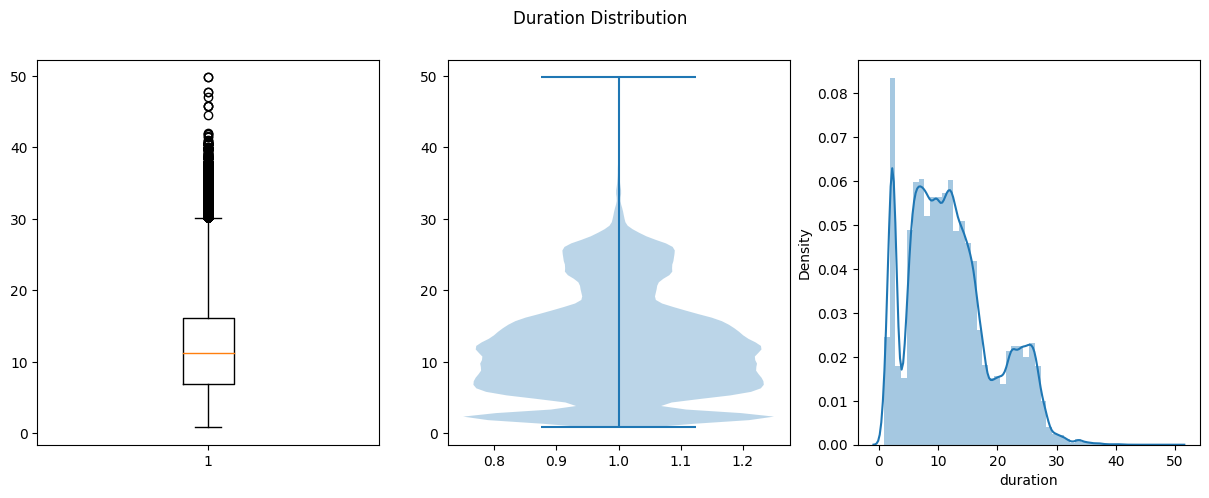

In [83]:
# let's see

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Duration Distribution')

ax1.boxplot(df['duration'])
ax2.violinplot(df['duration'])
sns.distplot(df['duration']);

In [84]:
classes, counts = np.unique(df['class'], return_counts=True)

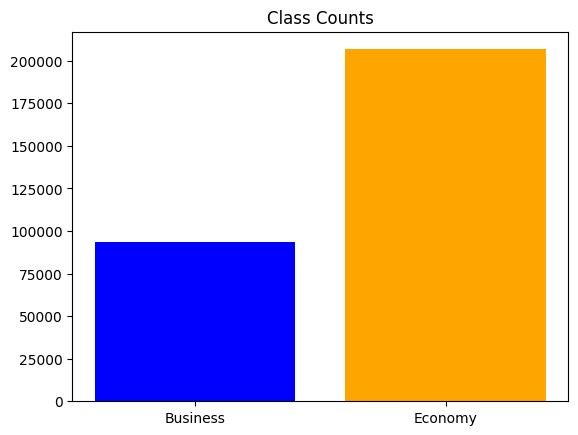

In [85]:
plt.title('Class Counts')
plt.bar(classes, counts, color=['blue', 'orange']);

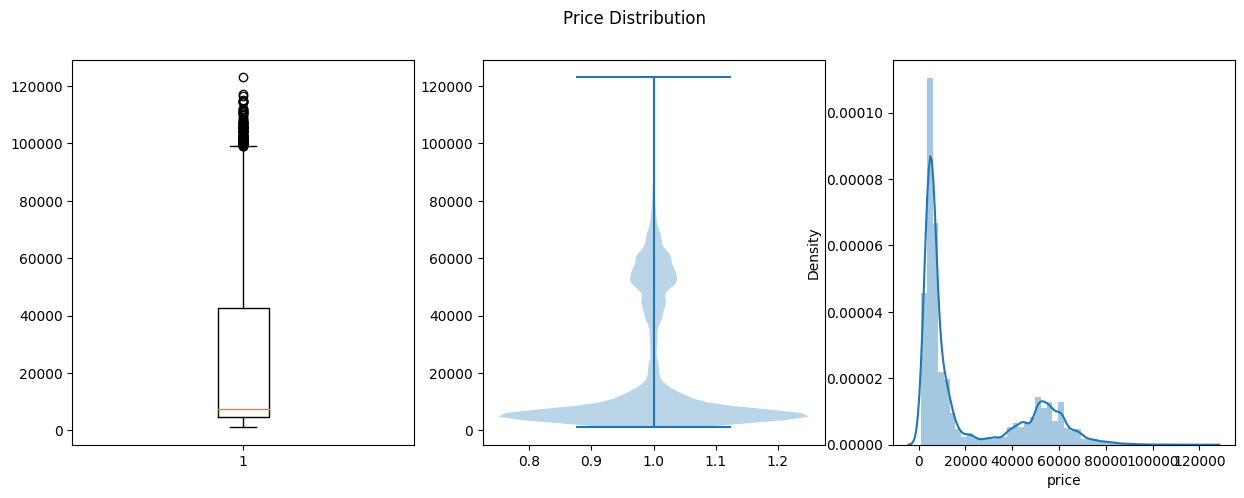

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

fig.suptitle('Price Distribution')

ax1.boxplot(df['price'])
ax2.violinplot(df['price'])
sns.distplot(df['price']);

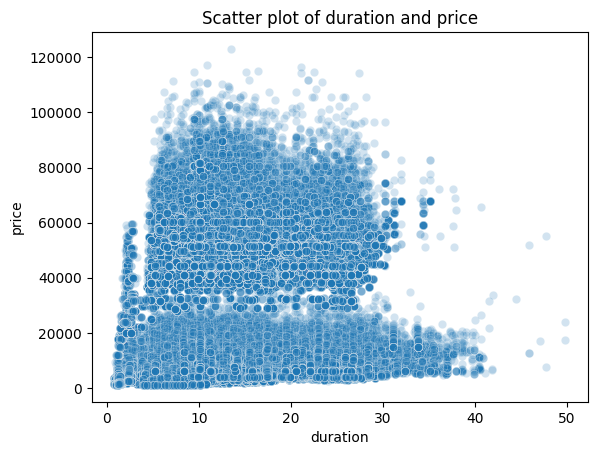

In [87]:
plt.title('Scatter plot of duration and price')
sns.scatterplot(x='duration', y='price', data=df, alpha=0.2);

## **Let's see heatmap**
Actually this dataset is good because all the features seem to be reasonable and highly correlated...

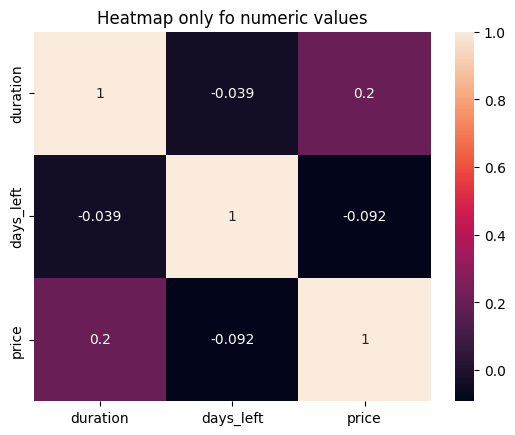

In [88]:
plt.title('Heatmap only fo numeric values')
sns.heatmap(df.corr(numeric_only=True), annot=True);

Okay... Some of my guesses were not that right<br>
but let's transform categorical features.<br>
I'll onehot encode them, so it will be more features now in our dataset.

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [90]:
df.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [91]:
cat = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class']

numeric = ['duration', 'days_left']

In [92]:
df[numeric] = StandardScaler().fit_transform(df[numeric])

In [93]:
df = pd.get_dummies(df, dtype=int)
df.shape

(300153, 38)

In [94]:
df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,-1.397531,-1.843875,5953,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,-1.375284,-1.843875,5953,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,-1.397531,-1.843875,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,-1.386407,-1.843875,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
4,-1.375284,-1.843875,5955,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1


In [95]:
X = df.drop('price', axis=1)
y = df['price']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# **Let's start with something simple**

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [100]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [101]:
y_train_pred = cross_val_predict(linear_reg, X_train, y_train, cv=3)

In [102]:
mean_squared_error(y_train, y_train_pred)

45522440.19476771

In [103]:
from sklearn.model_selection import learning_curve

In [104]:
train_sizes, train_score, val_score = learning_curve(
    linear_reg, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 40),
    cv=3, scoring='neg_root_mean_squared_error')

In [105]:
train_errs = -train_score.mean(axis=1)
val_errs = -val_score.mean(axis=1)

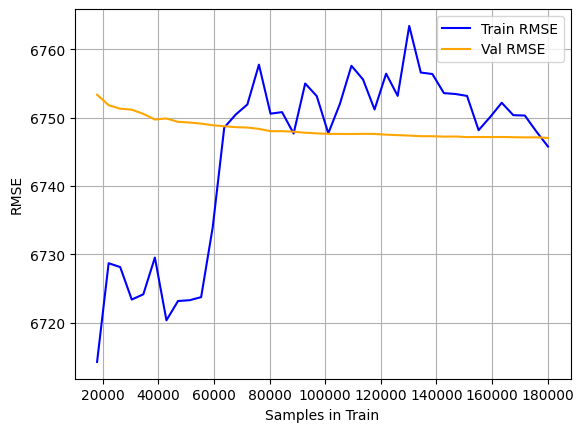

In [106]:
plt.plot(train_sizes, train_errs, color='blue', label='Train RMSE')
plt.plot(train_sizes, val_errs, color='orange', label='Val RMSE')

plt.xlabel('Samples in Train')
plt.ylabel('RMSE')

plt.grid()
plt.legend()

plt.show()

# **UNDERFITTING**<br>
<img src='https://media1.tenor.com/m/rNhgVLrEtioAAAAC/noot-noot-meme.gif'>

As we have a lot of categorical variables in our dataset why not to apply KNN?

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# **F🧲CK THIS**
It's impossible to work with such a big dataset in Colaboratory...